In [ ]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = -5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

In [206]:
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

In [207]:
class Perceptron(object):
    def __init__(self, data):
        self.W = np.zeros(len(data[0:3]))
        self.flag = True
        self.updates = 0;
    
    def predict(self, x):
        activation = np.sign(np.dot(self.W.T,x))
        return activation
    
    def fit(self, data):
        X = np.array(data)[:,0:3]
        d = np.array(data)[:, 3:4]
        
        while self.flag:
            self.flag = True
            for i in range(len(data)):
                y = self.predict(X[i])
                
                if y * d[i] <= 0:
                    self.W = self.W + d[i] * X[i]
                    self.updates += 1
                    self.flag = False
                    
            if self.flag:
                break
            else:
                self.flag = True


In [243]:
perceptron = Perceptron(data)
perceptron.fit(data)
print("Weight matrix =",perceptron.W)
print ("Number of updates =", perceptron.updates)



KeyboardInterrupt: 

# No output as perceptron never converges

In [235]:
class PerceptronWithOneUpdate(object):
    def __init__(self,data):
        self.W = np.zeros(len(data[0:3]))
    
    def predict(self, x):
        activation = np.sign(np.dot(self.W.T,x))
        return activation
    
    def fit(self, data):
        X= np.array(data)[:, 0:3]
        d = np.array(data)[:, 3:4]
        flag = True
        while flag:
            for i in range(len(data)):
                y = self.predict(X[i])
                
                if y * d[i] <= 0:
                    self.W = self.W + d[i] * X[i]
                    flag = False;
                    break;
            return self.W
        

In [236]:
class Pocket(object):
    def __init__(self, data):
        self.W = np.zeros(len(data[0:3]))
        self.Emin = self.computeEmin(data,self.W)
        self.EminArr = []
        self.Iterations = []
        self.Wcurr = self.W
    
    def predict(self, x, W):
        activation = np.sign(np.dot(W.T,x))
        return activation
    
    def computeEmin(self, data, W):
        count = 0
        X = np.array(data)[:, 0:3]
        d = np.array(data)[:, 3:4] 
        for i in range(len(data)):
            if d[i] != self.predict(X[i], W):
                count = count + 1
        return count/len(data)
    
    def compute(self, data):
        perceptron = PerceptronWithOneUpdate(data) 
        
        for i in range(100000):
            self.Wcurr = perceptron.fit(data)
            newEmin = self.computeEmin(data,self.Wcurr)
            
            if  newEmin < self.Emin:
                self.Emin = newEmin
                self.W = self.Wcurr
            self.EminArr.append(self.Emin)
            self.Iterations.append(i+1)


In [237]:
pocket = Pocket(data)
pocket.compute(data)
print(pocket.W);

[-67.          -5.32875535  40.23902156]


# Plot of Emin vs Iterations for pocket algorithm

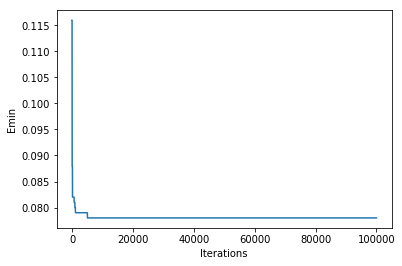

In [238]:
import matplotlib.pyplot as plt
plt.plot(pocket.Iterations,pocket.EminArr, label='g(x)')
plt.xlabel("Iterations");
plt.ylabel("Emin");
plt.show()


# Plot of Pocket Algorithm

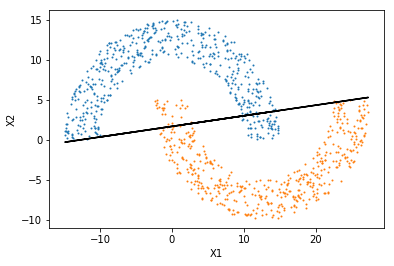

In [239]:
import matplotlib.pyplot as plt
X = np.array(data)[:,0:3]
plt.plot(X,-(pocket.W[1]/pocket.W[2])*X - pocket.W[0]/pocket.W[2] , color='black', linestyle='-', label='g(x)')
plt.xlabel("X1");
plt.ylabel("X2");
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()



In [240]:
class LinearRegression(object):
    def __init__(self, data):
        self.Wmin = []
        
    def compute(self, data):
        X = np.array(data)[:,0:3]
        y = np.array(data)[:, 3:4]
        self.Wmin = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)), np.transpose(X)), y)

In [241]:
linearRegression = LinearRegression(data)
linearRegression.compute(data)

# Plot of Linear Regression

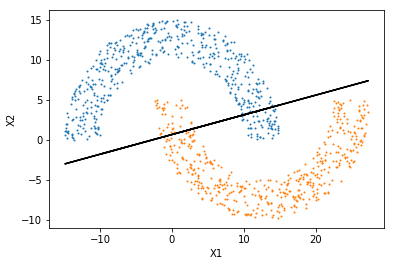

In [242]:
X = np.array(data)[:,0:3]
Y = np.array(data)[:, 3:4]
plt.plot(X,-(linearRegression.Wmin[1]/linearRegression.Wmin[2])*X - linearRegression.Wmin[0]/linearRegression.Wmin[2] , color='black', linestyle='-', label='g(x)')
plt.xlabel("X1");
plt.ylabel("X2");
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

# Linear regression takes less time than pocket algorithm.

# However pocket algorithm performs better than Linear algorithm
